## Oblig 1 in NLP 
### Exercise 1

In [1]:
import nltk
from nltk.corpus import brown
import pandas as pd
from nltk import pos_tag

In [2]:
labels = ['he', 'him', 'she','her']
genres = ['news','fiction','religion','government','romance']

In [3]:
cond = nltk.ConditionalFreqDist([(genre, word.lower()) 
                                 for genre in genres
                                 for word in brown.words(categories=genre) 
                                 if word.lower() in labels])
df=pd.DataFrame(cond, columns=genres)
df.fillna(0)
freq_labels = df.sum(axis = 1, skipna = True)
df['total'] = freq_labels.to_frame()

sum_genres = df.sum(axis = 0, skipna = True) 
modDfObj = df.append(sum_genres, ignore_index=True)

total = modDfObj['total'][4]
print(total)
df


6796


,news,fiction,religion,government,romance,total
he,642,1308,206,169,1068,3393
him,93,382,94,26,340,935
she,77,425,12,1,728,1243
her,121,413,8,3,680,1225


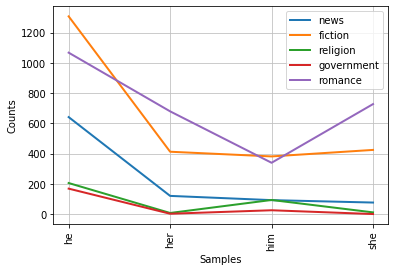

In [4]:
%matplotlib inline
cond.plot()

From the observations we can see that the masculine forms are more frequent than the feminine forms across all
genres. 
The objective forms has an almost equal frequency throughout the chart.
We can also see that news and fiction graphs follow the same pattern and her him she has a constant number in the genres. 
Romance tends to use the nominative forms more frequent than the objective form. 
Government and religion has the lowest frequency count of the labels. 

In [6]:
tk = nltk.ConditionalFreqDist() 

for genre in genres:
    for word in brown.words(categories=genre):
        w = word.lower()
        if w in labels:
            if w == 'he' or w == 'she':
                tk[genre]['nom_form'] += 1
            elif w == 'him' or w == 'her':
                tk[genre]['obj_form'] += 1
                
df1=pd.DataFrame(tk, columns=genres)
df1.fillna(0)

,news,fiction,religion,government,romance
nom_form,719,1733,218,170,1796
obj_form,214,795,102,29,1020


In [7]:

he = float("{0:.3f}".format(freq_labels['he'] / total))
him = float("{0:.3f}".format(freq_labels['him'] / total))
she = float("{0:.3f}".format(freq_labels['she'] / total))
her = float("{0:.3f}".format(freq_labels['her'] / total))
data = [ [(he) ,(him) ,(she), (her)]]
df = pd.DataFrame(data, columns = ['he', 'him','she','her'])
df

,he,him,she,her
0,0.499,0.138,0.183,0.18


In [8]:
brown_tagged = brown.tagged_words(categories=genres, tagset='universal')
brown_tagged_pron = [word.lower() for (word, tag) in brown_tagged if tag == 'PRON']

pos_tagged = pos_tag(brown_tagged_pron)
labels = ['he', 'him', 'she','her','hers','his']
labels.sort()
tagged_words = [
            (word,tag) 
                for (word,tag) in pos_tagged 
                    if word.lower() in labels 
                    if tag == 'PRP$'
                    or tag == 'PRP']

In [9]:
cond = nltk.ConditionalFreqDist(tagged_words)

df2=pd.DataFrame(cond, columns=labels).fillna(0)
df2

,he,her,hers,him,his,she
PRP,3393.0,39,0,935.0,0.0,1243.0
PRP$,0.0,397,0,0.0,17.0,0.0


In [10]:
her = float("{0:.3f}".format(df2['her'].PRP / total))
he = float("{0:.3f}".format(df2['he'].PRP / total))
she = float("{0:.3f}".format(df2['she'].PRP / total))
him = float("{0:.3f}".format(df2['him'].PRP / total))
data = [ [(he) ,(him) ,(she), (her)]]
df_new = pd.DataFrame(data, columns = ['he', 'him','she','her'])
df

,he,him,she,her
0,0.499,0.138,0.183,0.18


In [11]:
df_new

,he,him,she,her
0,0.499,0.138,0.183,0.006


Write a short essay (200-300 words) where you discuss the consequences of your findings.
Consider in particular, why do you think the masculine pronoun is more frequent than the
feminine pronoun? If you find that the there is a different distribution between nominative
and objective forms for the masculine and the feminine pronouns, why do you think that is
the case? Do you see any consequences for the development of language technology in
general, and for language technology derived from example texts, in particular? Make use of
what you know about the Brown corpus.

I think that the masculine pronoun is more frequent than the feminine pronoun because I think men use more personal pronouns when writing, maybe to display power and influence over others.

## Exercise 2

In [12]:
from urllib import request
from nltk import word_tokenize
import re, string
import numpy as np

In [13]:
url = "https://www.gutenberg.org/files/74/74-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

In [14]:
text = re.search("(?<=HARTFORD, 1876.)[\s\S]*CONCLUSION", raw)[0] # lookbehind from conclusion to start of book
text = text[:-10] # remove word: conclusion 
text = text.replace('.','') # replace punctuation with nothing
tokens = nltk.word_tokenize(text)
tokens[:5] # first five words in book
tokens = [t.lower() for t in tokens if t.isalpha()]

In [15]:
# I do not want to case fold the text since some words will loose its meaning, like names etc.

In [16]:
tokens_freq = nltk.FreqDist(tokens)
most_common = tokens_freq.most_common(20)
token_df=pd.DataFrame(most_common, columns=['token', 'freq'])
token_df.style.hide_index()

token,freq
the,3694
and,3082
a,1824
to,1706
of,1426
it,1303
he,1242
was,1178
that,1013
i,1003


In [17]:
def n_times(n):
    return df.freq == n

def between_11_and_50():
    x = df.freq > 11
    y = df.freq < 50
    return x & y

def between_50_and_100():
    x = df.freq > 50
    y = df.freq < 100
    return x & y

def from_51_to_100():
    x = df.freq >= 51
    y = df.freq <= 100
    return x & y
    

In [18]:
df = pd.DataFrame(tokens_freq.items(), columns=['token', 'freq'])

select_n_times = df.loc[n_times(3)]

select_one_time = df.loc[df.freq == 1]

select_between_11_and_50 = df.loc[between_11_and_50()]

select_between_50_and_100 = df.loc[between_50_and_100()]

select_larger_than_100 = df.loc[df.freq > 100]

select_51_100 = df.loc[from_51_to_100()]


In [19]:
x = df.loc[df.freq > 3000]

In [20]:
a = select_one_time.sum(axis=1).count()
b = select_between_11_and_50.sum(axis=1).count()
c = select_between_50_and_100.sum(axis=1).count()
d = select_larger_than_100.sum(axis=1).count()
e = select_51_100.sum(axis=1).count()
Selectors = ['one time', 'between 11 and 50', 'between 50 and 100', 'larger than 100','51-100']

In [21]:
raw_data = {'Selectors': Selectors, 
        'Occurrences': [a,b,c,d,e]}
df = pd.DataFrame(raw_data, columns = ['Selectors', 'Occurrences'])
df

,Selectors,Occurrences
0,one time,3384
1,between 11 and 50,407
2,between 50 and 100,79
3,larger than 100,101
4,51-100,79


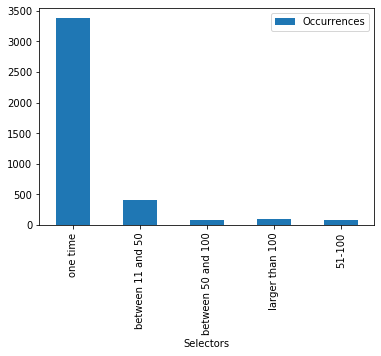

In [22]:
df.plot(kind='bar',x='Selectors',y='Occurrences')

In [23]:
words = [(word) for (word,freq) in tokens_freq.most_common(20)]
freq = [(freq) for (word,freq) in tokens_freq.most_common(20)]
rank = [rank for rank in range(1,21)]


In [24]:
raw_data = {
        'Words': words,
        'Frequency': freq,
        'Rank': rank
}
df = pd.DataFrame(raw_data, columns = ['Words', 'Frequency', 'Rank'])

df['zip'] = df.Frequency*df.Rank
df

,Words,Frequency,Rank,zip
0,the,3694,1,3694
1,and,3082,2,6164
2,a,1824,3,5472
3,to,1706,4,6824
4,of,1426,5,7130
5,it,1303,6,7818
6,he,1242,7,8694
7,was,1178,8,9424
8,that,1013,9,9117
9,i,1003,10,10030


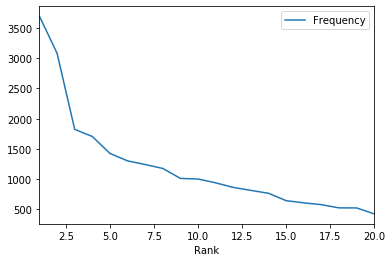

In [25]:
df.plot(kind='line',x='Rank',y='Frequency')

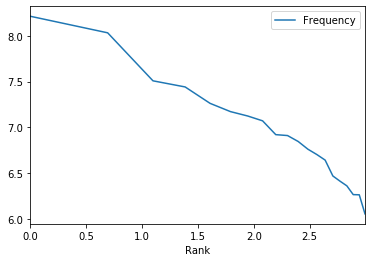

In [26]:
df_copy = df.copy()
df_copy['Rank'] = np.log(df.Rank.values)  
df_copy['Frequency'] = np.log(df.Frequency.values)  
df_copy.plot(kind='line',x='Rank',y='Frequency')

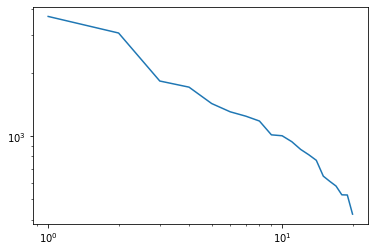

In [27]:
import matplotlib.pyplot as plt 
plt.loglog(df.Rank.values, df.Frequency.values)

### Exercise 3

In [28]:
def factorial(n):
    if n == 1:
        return n
    else:
        return n * factorial(n-1)
t = factorial(5)
t

120

In [29]:

def binom(n,m):
    if n == m:
        return 1
    return factorial(n)//(factorial(m)*factorial(n-m))
print(binom(10,7))    
print(binom(5,3))
print(1/binom(34,7)) # $lotto$
print(binom(1,1))

120
10
1.858868737099451e-07
1


In [30]:
def binom_pmf(k, n, p):
    if k == 0:
        return 
    if k>=n:
        return 0
    return binom(n,k)*p**k*(1-p)**(n-k)

print("Eksempel: Dersom man kaster en terning tre ganger, og terningen er velbygd, slik at sannsynligheten for å få en sekser er 1/6, blir sannsynligheten for å få sekser to ganger")
print(binom_pmf(2,3,1/6))

Eksempel: Dersom man kaster en terning tre ganger, og terningen er velbygd, slik at sannsynligheten for å få en sekser er 1/6, blir sannsynligheten for å få sekser to ganger
0.06944444444444445


In [31]:
def binom_cdf(k,n,p):
    answer = 0
    for i in range(1,k+1):
        answer = answer + binom_pmf(i,n,p)
    return answer

binom_cdf(15,100,0.2)

0.1285055146350941

In [32]:
n = 8
p = 0.5
k = [1,2,3,4,5,6,7,8]
pmf = []
cdf = []
for i in k:
    cdf.append(binom_cdf(i,n,p))

for i in k:
    pmf.append(binom_pmf(i,8,p))
print("pmf ",pmf)
print("cdf ", cdf)
raw_data = {
        'pmf': pmf,
        'cdf': cdf
}
df = pd.DataFrame(raw_data, columns = ['pmf', 'cdf'])
df

pmf  [0.03125, 0.109375, 0.21875, 0.2734375, 0.21875, 0.109375, 0.03125, 0]
cdf  [0.03125, 0.140625, 0.359375, 0.6328125, 0.8515625, 0.9609375, 0.9921875, 0.9921875]


,pmf,cdf
0,0.031250,0.031250
1,0.109375,0.140625
2,0.218750,0.359375
3,0.273438,0.632812
4,0.218750,0.851562
5,0.109375,0.960938
6,0.031250,0.992188
7,0.000000,0.992188


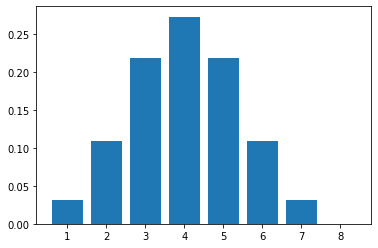

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(k,pmf)
plt.show()

In [34]:
cdf = binom_cdf(5,5,1/6)
cdf

0.5979938271604939

### Exercise 4

In [35]:
# the function simulates The Bernoulli distribution. The Bernoulli distribution describes events having exactly two outcomes.
import random

def mean(arr):
    total=0
    for i in arr:
        total = total + i
    return total/len(arr)
    
def bernoulli(p):
    if random.random() < p:
        return 1
    else:
        return 0

In [36]:
results = [i for i in range(10) if bernoulli(0.5) == 1] # returns if sucess
len(results)/10

0.5

In [37]:
from collections import Counter 

In [38]:
def bin_exper(n, p):
    return len([i for i in range(n) if bernoulli(p) == 1]) # returns if sucess

means = []
for i in range(20):
    means.append(bin_exper(10, 0.5))

mean(means)/10 

0.5349999999999999

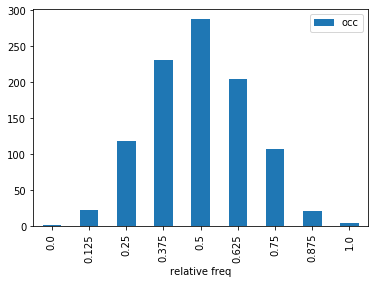

In [57]:
#We will inspect the effect of running an experiment many times and taking the averages.
#Make a function bin_freqs(m, n, p) which runs bin_exper(n, p) m many times and returns the
#relative frequencies of k successes of bin_exper(n, p) for k = 0, 1, …, n i.e., the frequency of
#frequencies.



def bin_freqs(m, n, p):
    freq = []
    for i in range(m):
        x = bin_exper(n,p)/n
        freq.append(x)
    return nltk.FreqDist(freq)   


freqs = bin_freqs(10,8,0.5)

df=pd.DataFrame(freqs.items(),columns=['relative freq', 'occ'])
df.sort_values('relative freq',inplace=True)
df1.plot(kind='bar',x='relative freq',y='occ')




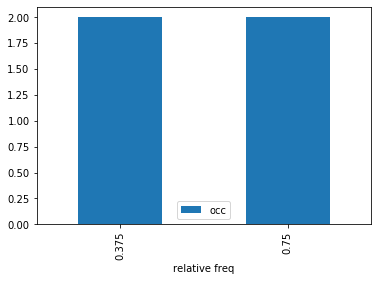

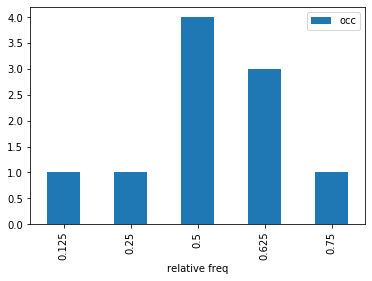

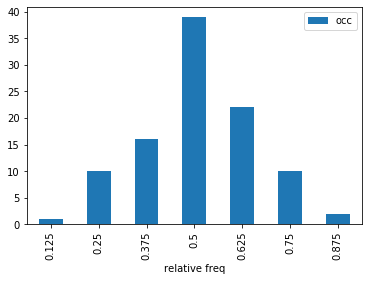

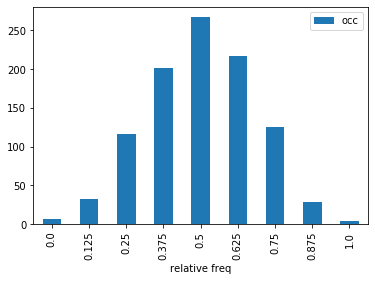

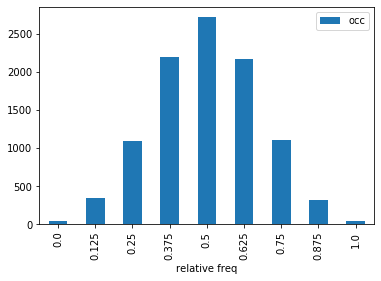

In [53]:
n = 8
p = 0.5
m = [4,10,100,1000,10000]
items = []
for i in m:
    df=pd.DataFrame(bin_freqs(i,8,0.5).items(),columns=['relative freq', 'occ'])
    df.sort_values('relative freq',inplace=True)
    df.plot(kind='bar',x='relative freq',y='occ')
    